<h1><center>Predict cancer mortality rates for US counties - EDA</center><h1>
    
# 1. <a id='Introduction'>Introduction 🃏 </a>
    
###  1.1 What is Cancer Mortality Rates?
* Cancer mortality is the number of deaths due to cancer occurring in a specified population over a given period of time (typically 1 year).

###  1.2 What is OLS Regression Challenge?
- In this competition, you will build a multivariate Ordinary Least Squares regression model to predict Cancer Mortality Rates for US countries.

# 2. <a id='importing'>Importing the necessary libraries📗</a> 

In [1]:
import pandas as pd 
import numpy as np  
from data_ingest import IngestData 

# 3. <a id='reading'>Reading the train.csv 📚</a>

In [2]:
data = pd.read_csv('ols-regression-challenge-data/data/cancer_reg.csv') 
data.head() 


,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


# 4. <a id='basic'>Basic Data Exploration 🏕️</a> 

In [4]:
print(data.info()) 
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  avghouseholdsize         3047 non-null   float64
 14  percentmarried          

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


### Missing values

In [5]:
null_values = data.isnull().sum()
print(null_values[null_values > 0]) 

pctsomecol18_24            2285
pctemployed16_over          152
pctprivatecoveragealone     609
dtype: int64


### Analyzing Variables

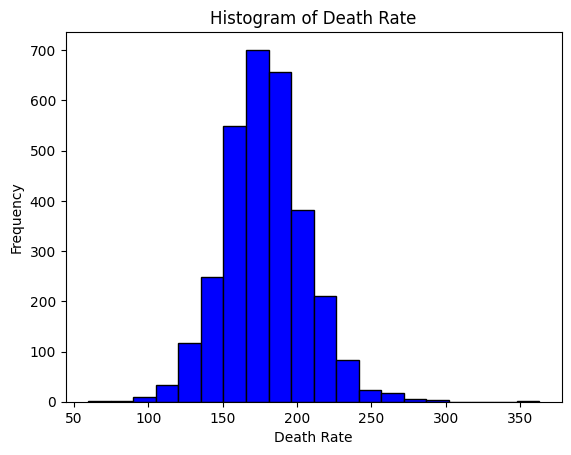

In [6]:
import matplotlib.pyplot as plt

plt.hist(data['target_deathrate'], bins = 20, color = 'blue', edgecolor = 'black')
plt.xlabel('Death Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Death Rate')
plt.show()

#### Interpretation of Histogram 

- The values are grouped into bins along the x-axis. The height of the bar indicates how many values of the data set fall into that bin.  
- In this histogram, it shows all of the death rates where in x-axis is the death rate divided in bins and y-axis is the number of counties in that bin. 
- 0-100 is the first bin which includes death between 0-100, 100-200 is the second bin which includes death between 100-200 and so on. 

With the help of this, we will be able to answer following questions:- 

- Where is the center of the data?
- What is the spread of the data? What is the range?
- What is the shape of the data? For example, is it symmetric, skewed, uniform, or bimodal?

**To Note:-** 

- A number line (typically the x-axis) spans from the minimum value to the maximum value for one numeric variable of the data set.

- This number line is broken into equally sized intervals, called bins, covering the range of values in the data. 

- A histogram shows how frequently a value falls into a particular bin.

- The height of each bar represents the number of values in the data set that fall within a particular bin. 

- When the y-axis is labeled as "count" or "number", the numbers along the y-axis tend to be discrete positive integers. The height of each bar represents the amount of data points that fall within each bin.

- A histogram makes it easy to see which values are most common and which values are least common in a data set.

Look at :- https://www.labxchange.org/library/items/lb:LabXchange:10d3270e:html:1#:~:text=A%20histogram%20shows%20how%20frequently,to%20be%20discrete%20positive%20integers. 

**Observations:-** 

- Slightly Positively Skewed Data 
- There are outliers as well (be careful) 
- Normal Distributed Data
- Mean is greater than median (slightly positively skewed data)
- There are 3 peaks in the data (bimodal data) 